In [1]:
import csv 
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SpotifySongs").getOrCreate()

df = spark.read.csv("/home/ec2-user/stream-processing-template/my-files/phase01/spotify-2023.csv", header=True, inferSchema=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/12 12:56:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/usr/local/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


Tasks:

**Most Streamed & Highest Ranking Tracks:**

- Identify the top 5 tracks with the highest number of streams in 2023.
- Identify the top 5 ranking tracks across all platforms.
- Is there any crossover between these two findings?

**Artists with Most Tracks in Spotify Charts:**

-Group by the artist's name and count how many of their tracks made it to the Spotify charts. Display the top 10 artists.
-Filter and Select Attributes of Danceable Tracks:

**Extract tracks with a danceability percentage of more than 80% and display their name, artist, bpm (beats per minute), and danceability percentage.**

-Identify any possible correlation between danceability and bpm.
-Once you've executed these tasks, share your findings. Do any tracks or artists stand out? Were there any surprises in the danceable tracks list?

In [2]:
df.show(5)

+--------------------+----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+
|          track_name|  artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|  streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|
+--------------------+----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+------

Top 5 tracks with highest number of streams in 2023

In [3]:
top_streams = df.orderBy(df.streams.desc()).show(5)
top_streams

+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+
|          track_name|   artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|             streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|
+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+----

In [4]:
df.filter(df['artist(s)_name'] == "Edison Lighthouse").show()

+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+
|          track_name|   artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|             streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|
+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+----

In [5]:
df_filtered = df.filter(df['artist(s)_name'] == "Edison Lighthouse").select("track_name").show()
df_filtered

+--------------------+
|          track_name|
+--------------------+
|Love Grows (Where...|
+--------------------+



In [6]:
df.orderBy(df.streams.desc()).show(6)

+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+
|          track_name|   artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|             streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|
+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+----

Identify the top 5 ranking tracks across all platforms.

In [7]:
df = df.withColumn("total_charts_presence", df.in_spotify_charts + df.in_apple_charts + df.in_deezer_charts + df.in_shazam_charts)

In [8]:
df.show(5)

+--------------------+----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+---------------------+
|          track_name|  artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|  streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|total_charts_presence|
+--------------------+----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+-----

In [9]:
df_not_null = df.filter(df['total_charts_presence'].isNotNull())

In [10]:
top_chart_presence = df_not_null.orderBy(df.total_charts_presence.desc()).show(5)
top_chart_presence

+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+---------------------+
|          track_name|   artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|  streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|total_charts_presence|
+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--

Is there any crossover between top5 tracks with highest streams and top 5 ranking tracks across all platforms

In [11]:
top_streams = df.orderBy(df.streams.desc()).show(6)
top_streams

+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+---------------------+
|          track_name|   artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|             streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|total_charts_presence|
+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+--------------------+------------------+---------------+-------------------+----------------+----------------+---+---+

In [12]:
top_chart_presence = df_not_null.orderBy(df.total_charts_presence.desc()).show(5)
top_chart_presence

+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--------+--------------+------------------+----------+-------------+---------------------+
|          track_name|   artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|  streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm|key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|total_charts_presence|
+--------------------+-----------------+------------+-------------+--------------+------------+--------------------+-----------------+---------+------------------+---------------+-------------------+----------------+----------------+---+---+-----+--------------+---------+--

Artist with most tracks in Spotify Charts

In [13]:
df.groupBy("artist(s)_name").count().show()

+--------------------+-----+
|      artist(s)_name|count|
+--------------------+-----+
|             YOASOBI|    1|
|           Lil Nas X|    3|
|The Weeknd, Gesaf...|    2|
|    Semicenk, Do��u |    1|
|         Beach House|    1|
|Drake, Project Pa...|    1|
|          Surf Curse|    1|
|          Juice WRLD|    2|
|      Mar��lia Mendo|    1|
|Bad Bunny, Grupo ...|    1|
|Nicki Minaj, Aqua...|    1|
|       Maria Becerra|    1|
|Cigarettes After Sex|    1|
|         Tones and I|    1|
|         Niall Horan|    1|
|         Central Cee|    2|
|Anuel Aa, Jhay Co...|    1|
|The Chainsmokers,...|    1|
|Luis R Conriquez,...|    1|
|              Oxlade|    1|
+--------------------+-----+
only showing top 20 rows



In [14]:
result_df = (
    df.groupBy("artist(s)_name")
      .agg({"in_spotify_charts": "sum"})
      .withColumnRenamed("sum(in_spotify_charts)", "Count_Positive_Values")
)

result_df.orderBy(result_df['Count_Positive_Values'].desc()).show(10)


+----------------+---------------------+
|  artist(s)_name|Count_Positive_Values|
+----------------+---------------------+
|    Taylor Swift|                  542|
|       Bad Bunny|                  268|
|  Arctic Monkeys|                  190|
|    Harry Styles|                  185|
|      The Weeknd|                  180|
|        NewJeans|                  168|
|            Feid|                  165|
|          Eminem|                  152|
|         Karol G|                  149|
|Latto, Jung Kook|                  147|
+----------------+---------------------+
only showing top 10 rows



Filter and Select Attributes of Danceable Tracks

In [17]:
danceable_tracks = df.filter(df['danceability_%']>80).select("track_name", "artist(s)_name", "bpm", "danceability_%").show()
danceable_tracks

+--------------------+--------------------+---+--------------+
|          track_name|      artist(s)_name|bpm|danceability_%|
+--------------------+--------------------+---+--------------+
|            Sprinter|   Dave, Central Cee|141|            92|
|            fukumean|               Gunna|130|            85|
|     La Bebe - Remix|Peso Pluma, Yng L...|170|            81|
|          Classy 101|    Feid, Young Miko|100|            86|
|Peso Pluma: Bzrp ...|Bizarrap, Peso Pluma|133|            85|
|Popular (with Pla...|The Weeknd, Madon...| 99|            85|
|        MOJABI GHOST|    Tainy, Bad Bunny|122|            81|
|     Los del Espacio|Big One, Duki, Li...|120|            81|
|            AMARGURA|             Karol G|107|            92|
|          La Bachata|       Manuel Turizo|125|            84|
|                 S91|             Karol G|128|            86|
|                 T��|dennis, MC Kevin ...|130|            86|
|Left and Right (F...|Charlie Puth, BTS...|101|        

In [23]:
import matplotlib.pyplot as plt

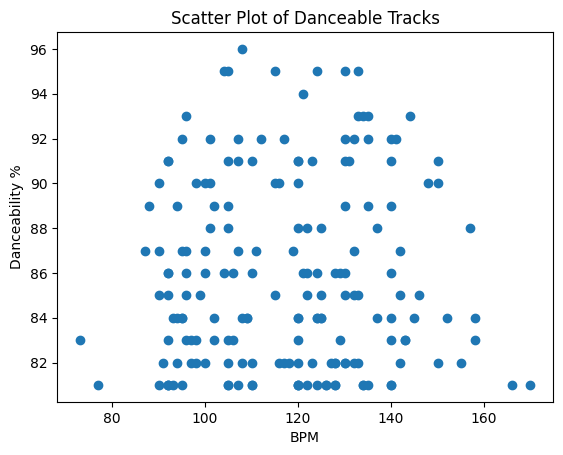

In [29]:
danceable_tracks = df.filter(df['danceability_%']>80).select("track_name", "artist(s)_name", "bpm", "danceability_%").collect()


# Extract data for plotting
bpm_values = [row.bpm for row in danceable_tracks]
danceability_values = [row['danceability_%'] for row in danceable_tracks]

plt.scatter(bpm_values, danceability_values)
plt.xlabel("BPM")
plt.ylabel("Danceability %")
plt.title("Scatter Plot of Danceable Tracks")
plt.show()


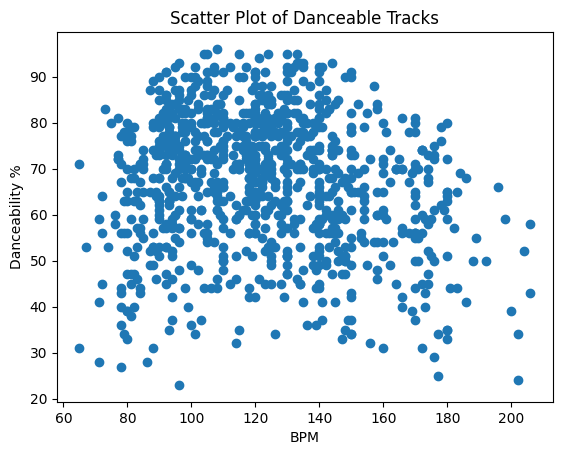

In [30]:
all_tracks = df.select("track_name", "artist(s)_name", "bpm", "danceability_%").collect()


# Extract data for plotting
bpm_values = [row.bpm for row in all_tracks]
danceability_values = [row['danceability_%'] for row in all_tracks]

plt.scatter(bpm_values, danceability_values)
plt.xlabel("BPM")
plt.ylabel("Danceability %")
plt.title("Scatter Plot of Danceable Tracks")
plt.show()